<a href="https://colab.research.google.com/github/Harsh-Ratna/Stockout-Prediction-for-Inventory-Management/blob/main/Inventory_Stockout_Prediction_Aston_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import matplotlib.image as mpimg
import glob

In [ ]:
import pandas as pd


In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/Aston/Back_order_train.csv")

<ipython-input-5-764d93fdd2bf>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv("/content/drive/MyDrive/Aston/Back_order_train.csv")


In [ ]:
df_train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [ ]:
df_train.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [ ]:
df_train.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [ ]:
df_train.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [ ]:
df_train["went_on_backorder"].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [ ]:
df_train['lead_time'].value_counts()

8.0     682186
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
1.0         21
23.0        14
25.0         7
Name: lead_time, dtype: int64

In [ ]:
modde=df_train['lead_time'].mode()
modde

0    8.0
Name: lead_time, dtype: float64

In [ ]:
df_train["lead_time"].fillna(8.0,inplace =True)

In [ ]:
df_train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [ ]:
df_train.isnull().sum()

sku                  0
national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [ ]:
df_train.select_dtypes(include=['object']).columns


Index(['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [ ]:
label=['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder']

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_train[label] = df_train[label].apply(LabelEncoder().fit_transform)

df_train[label].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0


In [ ]:
df_train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,0,0,0,1,0,0
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [ ]:
## 0- NO and 1 - Yes

In [ ]:
df_train['sku'] = df_train['sku'].astype(float)

In [ ]:
df_train.dtypes

sku                  float64
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue        int64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
rev_stop               int64
went_on_backorder      int64
dtype: object

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/Aston/Back_order_test.csv")

<ipython-input-25-136ac1ab1a44>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test=pd.read_csv("/content/drive/MyDrive/Aston/Back_order_test.csv")


In [ ]:
df_test

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [ ]:
df_test["lead_time"].fillna(8.0,inplace =True)
df_test.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder

df_test[label] = df_test[label].apply(LabelEncoder().fit_transform)

df_test[label].head()
df_test['sku'] = df_test['sku'].astype(float)

In [ ]:
df_test

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085.0,62.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,3285131.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,3285358.0,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,3285517.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,3285608.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242070,3526987.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242071,3526988.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242072,3526989.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242073,3526990.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0


In [ ]:
df_test.dtypes

sku                  float64
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue        int64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
rev_stop               int64
went_on_backorder      int64
dtype: object

<Axes: >

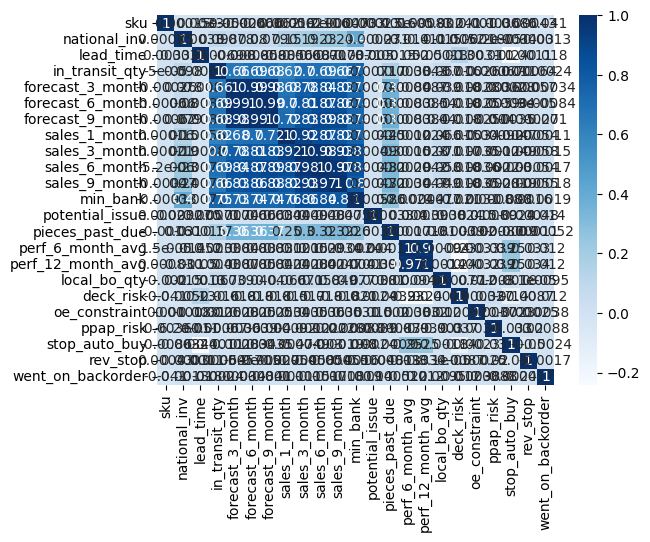

In [ ]:
sns.heatmap(df_train.corr(),cmap='Blues',annot=True)

In [ ]:
df_train.corr()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,1.000000,0.000147,0.003302,-0.000050,-0.000262,-0.000657,-0.000620,0.000163,0.000207,-0.000005,...,-0.001648,0.000015,0.000831,-0.001960,-0.040913,0.001035,-0.003614,-0.008567,0.000425,-0.040562
national_inv,0.000147,1.000000,0.003321,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,...,0.030677,-0.013544,-0.010732,0.014887,-0.005156,0.000185,-0.000062,-0.003380,-0.000305,-0.001315
lead_time,0.003302,0.003321,1.000000,-0.006863,-0.008045,-0.008548,-0.008773,-0.005618,-0.006769,-0.007117,...,-0.001510,-0.052305,-0.049527,-0.001259,0.134983,-0.003095,0.010739,-0.240950,0.001077,-0.018104
in_transit_qty,-0.000050,0.098238,-0.006863,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,...,0.167460,0.003282,0.004292,0.066612,-0.016188,0.002565,-0.000671,-0.001085,0.000644,-0.002427
forecast_3_month,-0.000262,0.078199,-0.008045,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,...,0.361214,0.008445,0.008694,0.039419,-0.017508,0.002798,-0.003625,0.002836,0.000574,-0.000340
forecast_6_month,-0.000657,0.079744,-0.008548,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,...,0.363147,0.008343,0.008499,0.039724,-0.017789,0.002473,-0.003864,0.003413,-0.000059,-0.000840
forecast_9_month,-0.000620,0.078948,-0.008773,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,...,0.366001,0.008306,0.008421,0.039732,-0.017939,0.002493,-0.003956,0.003536,-0.000274,-0.001030
sales_1_month,0.000163,0.147449,-0.005618,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,...,0.249526,0.001163,0.002370,0.066188,-0.014748,0.003402,-0.000919,-0.004737,-0.000541,-0.001131
sales_3_month,0.000207,0.192605,-0.006769,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,...,0.304565,0.001488,0.002837,0.071030,-0.017196,0.003500,-0.001229,-0.004920,-0.000576,-0.001512
sales_6_month,-0.000005,0.225067,-0.007117,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,...,0.323552,0.002898,0.004221,0.057765,-0.018170,0.003624,-0.002208,-0.002972,-0.000541,-0.001728


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif["features"] = df_train.columns
vif.round(1)

,VIF Factor,features
0,8.4,sku
1,1.9,national_inv
2,2.2,lead_time
3,3.0,in_transit_qty
4,91.8,forecast_3_month
5,473.9,forecast_6_month
6,267.4,forecast_9_month
7,7.6,sales_1_month
8,61.8,sales_3_month
9,98.1,sales_6_month


In [ ]:
df_train.drop(columns=["forecast_6_month"],inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif["features"] = df_train.columns
vif.round(2)

,VIF Factor,features
0,8.41,sku
1,1.87,national_inv
2,2.20,lead_time
3,2.74,in_transit_qty
4,32.33,forecast_3_month
5,55.14,forecast_9_month
6,7.59,sales_1_month
7,61.49,sales_3_month
8,97.33,sales_6_month
9,20.77,sales_9_month


In [ ]:
df_train.drop(columns=["sales_6_month"],inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif["features"] = df_train.columns
vif.round(3)

,VIF Factor,features
0,8.407,sku
1,1.678,national_inv
2,2.203,lead_time
3,2.737,in_transit_qty
4,29.442,forecast_3_month
5,42.757,forecast_9_month
6,7.384,sales_1_month
7,23.897,sales_3_month
8,12.931,sales_9_month
9,7.105,min_bank


In [ ]:
!pip install pyswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=472183b5eca689b2a31504a1ee9e1b3e4da785ef3958592388108837080856b1
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
df_test

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085.0,62.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,3285131.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,3285358.0,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,3285517.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,3285608.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242070,3526987.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242071,3526988.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242072,3526989.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242073,3526990.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0


In [ ]:
X_train_ = df_train.drop("went_on_backorder",axis=1)

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

corr_matrix = X_train_.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

mask = np.abs(corr_matrix) >= 0.1
mask = mask.astype(int)

In [ ]:
high_corr_features = set()

for i in range(len(mask.columns)):

  for j in range(i):

    if mask.iloc[i, j] == 1:

      colname = mask.columns[i]

      high_corr_features.add(colname)

In [ ]:
high_corr_features

{'deck_risk',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'min_bank',
 'perf_12_month_avg',
 'pieces_past_due',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'stop_auto_buy'}

In [ ]:
df_train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754.0,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,1373987.0,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,0,0,0,1,0,0
1687857,1524346.0,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,1439563.0,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [ ]:
df_train = df_train[["sku", 'deck_risk',
 'forecast_3_month',
 'forecast_9_month',
 'min_bank',
 'perf_12_month_avg',
 'pieces_past_due',
 'sales_1_month',
 'sales_3_month',
 'sales_9_month',
 'stop_auto_buy', 'went_on_backorder' ]]

In [ ]:
X_train = df_train.drop("went_on_backorder",axis=1)

In [ ]:
y_train=df_train["went_on_backorder"]

In [ ]:
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled

,sku,deck_risk,forecast_3_month,forecast_9_month,min_bank,perf_12_month_avg,pieces_past_due,sales_1_month,sales_3_month,sales_9_month,stop_auto_buy
0,1.026827e+06,0,0.000000,0.000000,0.000000,-99.000000,0.0,0.000000,0.000000,0.000000,1
1,1.043384e+06,0,0.000000,0.000000,0.000000,0.990000,0.0,0.000000,0.000000,0.000000,1
2,1.043696e+06,1,0.000000,0.000000,0.000000,-99.000000,0.0,0.000000,0.000000,0.000000,1
3,1.043852e+06,0,0.000000,0.000000,1.000000,0.130000,0.0,0.000000,0.000000,0.000000,1
4,1.044048e+06,1,0.000000,0.000000,2.000000,-99.000000,0.0,0.000000,0.000000,4.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
3353129,2.027115e+06,0,1.767298,3.937664,0.093016,0.410542,0.0,0.310052,1.023173,2.542429,1
3353130,1.632551e+06,0,121.544305,121.544305,0.000000,0.685230,0.0,0.448129,1.344386,4.929417,1
3353131,2.954585e+06,0,17.019099,29.912356,0.000000,0.768303,0.0,2.062921,12.094382,30.144941,1
3353132,1.599171e+06,0,26.168752,75.967740,0.000000,0.459846,0.0,4.938373,16.338228,32.307414,1


In [ ]:
y_train_resampled

0          0
1          0
2          0
3          0
4          0
          ..
3353129    1
3353130    1
3353131    1
3353132    1
3353133    1
Name: went_on_backorder, Length: 3353134, dtype: int64

In [ ]:
y_train_resampled_df = pd.DataFrame(y_train_resampled)

In [ ]:
y_train_resampled_df["went_on_backorder"].value_counts()

0    1676567
1    1676567
Name: went_on_backorder, dtype: int64

In [ ]:
df_test.drop(columns=["sales_6_month"],inplace=True)
df_test.drop(columns=["forecast_6_month"],inplace=True)

In [ ]:
df_test = df_test[["sku", 'deck_risk',
 'forecast_3_month',
 'forecast_9_month',
 'min_bank',
 'perf_12_month_avg',
 'pieces_past_due',
 'sales_1_month',
 'sales_3_month',
 'sales_9_month',
 'stop_auto_buy', 'went_on_backorder' ]]

In [ ]:
X_test=df_test.drop("went_on_backorder",axis=1)
y_test = df_test["went_on_backorder"]

In [ ]:
X_test

,sku,deck_risk,forecast_3_month,forecast_9_month,min_bank,perf_12_month_avg,pieces_past_due,sales_1_month,sales_3_month,sales_9_month,stop_auto_buy
0,3285085.0,1,0.0,0.0,1.0,-99.00,0.0,0.0,0.0,0.0,1
1,3285131.0,0,0.0,0.0,1.0,-99.00,0.0,0.0,0.0,0.0,0
2,3285358.0,0,0.0,0.0,0.0,0.95,0.0,0.0,0.0,0.0,1
3,3285517.0,0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,2.0,1
4,3285608.0,0,0.0,0.0,0.0,0.71,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
242070,3526987.0,1,0.0,0.0,1.0,0.48,0.0,0.0,0.0,0.0,1
242071,3526988.0,1,0.0,0.0,1.0,0.48,0.0,0.0,0.0,0.0,1
242072,3526989.0,1,0.0,0.0,1.0,0.48,0.0,0.0,0.0,0.0,1
242073,3526990.0,1,0.0,0.0,1.0,0.48,0.0,0.0,0.0,0.0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_resampled = sc.fit_transform(X_train_resampled)
X_test = sc.transform(X_test)

In [ ]:
X_train_resampled

array([[-1.48205007, -0.39381676, -0.03938888, ..., -0.0315321 ,
        -0.03195295,  0.24463415],
       [-1.45486425, -0.39381676, -0.03938888, ..., -0.0315321 ,
        -0.03195295,  0.24463415],
       [-1.45435196,  2.53925202, -0.03938888, ..., -0.0315321 ,
        -0.03195295,  0.24463415],
       ...,
       [ 1.68323781, -0.39381676, -0.03471341, ..., -0.02825686,
        -0.02909573,  0.24463415],
       [-0.54228763, -0.39381676, -0.03219983, ..., -0.0271076 ,
        -0.02889077,  0.24463415],
       [ 0.29880337, -0.39381676, -0.03728891, ..., -0.02861051,
        -0.03013659,  0.24463415]])

In [ ]:
X_train_resampled = pd.DataFrame(X_train_resampled,columns = X_train.columns)

In [ ]:
X_train_resampled

,sku,deck_risk,forecast_3_month,forecast_9_month,min_bank,perf_12_month_avg,pieces_past_due,sales_1_month,sales_3_month,sales_9_month,stop_auto_buy
0,-1.482050,-0.393817,-0.039389,-0.035518,-0.039250,-4.504637,-0.013803,-0.028008,-0.031532,-0.031953,0.244634
1,-1.454864,-0.393817,-0.039389,-0.035518,-0.039250,0.258973,-0.013803,-0.028008,-0.031532,-0.031953,0.244634
2,-1.454352,2.539252,-0.039389,-0.035518,-0.039250,-4.504637,-0.013803,-0.028008,-0.031532,-0.031953,0.244634
3,-1.454096,-0.393817,-0.039389,-0.035518,-0.038131,0.218002,-0.013803,-0.028008,-0.031532,-0.031953,0.244634
4,-1.453774,2.539252,-0.039389,-0.035518,-0.037012,-4.504637,-0.013803,-0.028008,-0.031532,-0.031574,0.244634
...,...,...,...,...,...,...,...,...,...,...,...
3353129,0.160376,-0.393817,-0.038903,-0.035136,-0.039146,0.231367,-0.013803,-0.027782,-0.031255,-0.031712,0.244634
3353130,-0.487480,-0.393817,-0.005998,-0.023726,-0.039250,0.244453,-0.013803,-0.027681,-0.031168,-0.031486,0.244634
3353131,1.683238,-0.393817,-0.034713,-0.032616,-0.039250,0.248411,-0.013803,-0.026505,-0.028257,-0.029096,0.244634
3353132,-0.542288,-0.393817,-0.032200,-0.028147,-0.039250,0.233716,-0.013803,-0.024412,-0.027108,-0.028891,0.244634


In [ ]:
X_train_resampled["went_on_backorder"]=y_train_resampled_df

In [ ]:
save_path = '/content/drive/MyDrive/Aston'
X_train_resampled.to_csv("scaled_data.csv", index=False)


In [ ]:
X_test

array([[ 2.22590384,  2.53925202, -0.03938888, ..., -0.0315321 ,
        -0.03195295,  0.24463415],
       [ 2.22597937, -0.39381676, -0.03938888, ..., -0.0315321 ,
        -0.03195295, -4.08773669],
       [ 2.2263521 , -0.39381676, -0.03938888, ..., -0.0315321 ,
        -0.03195295,  0.24463415],
       ...,
       [ 2.62309889,  2.53925202, -0.03938888, ..., -0.0315321 ,
        -0.03195295,  0.24463415],
       [ 2.62310053,  2.53925202, -0.03938888, ..., -0.0315321 ,
        -0.03195295,  0.24463415],
       [ 2.62310217,  2.53925202, -0.03938888, ..., -0.02340791,
        -0.02361208,  0.24463415]])

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, precision_score, recall_score

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

# Transform the test data using the trained LDA model


# Use the trained logistic regression model to make predictions on the transformed test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy: 0.9815181245481772

MSE: 0.018481875451822782
F1 Score: 0.9798516913147641
MSE: 0.018481875451822782
Precision: 0.9782034854149676
Recall: 0.9815181245481772


In [ ]:
X_trainn = sc.fit_transform(X_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_resampled, y_train_resampled)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)



# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Accuracy: 0.10096870804502736

MSE: 0.8990312919549727
F1 Score: 0.16593127539343383
Precision: 0.9824753078747078
Recall: 0.10096870804502736


In [ ]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()




In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9882763606320355
F1 Score: 0.9830884469701064
MSE: 0.011723639367964474
Precision: 0.9781340260596042
Recall: 0.9882763606320355


In [ ]:
#Using Random forest classifier
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9888960033047609
F1 Score: 0.9833750017368632
MSE: 0.01110399669523908
Precision: 0.9779153053521298
Recall: 0.9888960033047609


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


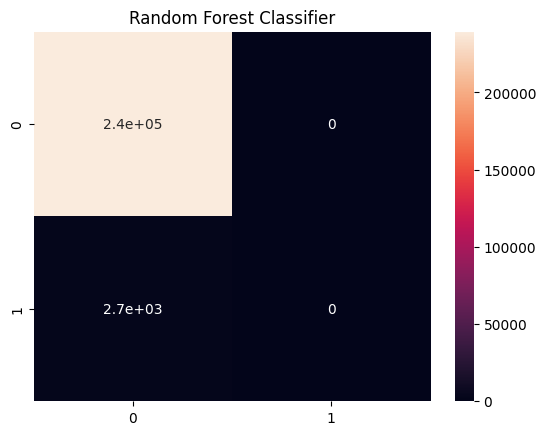

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.title("Random Forest Classifier")
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show();